In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date, time
import pickle

In [9]:
df_LA = pd.read_csv('../data/LA.csv')
df_LA

start_time             end_time  start_station_id  \
0       2018-01-01 00:04:00  2018-01-01 00:25:00              3063   
1       2018-01-01 00:05:00  2018-01-01 00:25:00              3063   
2       2018-01-01 00:06:00  2018-01-01 00:25:00              3063   
3       2018-01-01 00:13:00  2018-01-01 00:35:00              3018   
4       2018-01-01 00:14:00  2018-01-01 00:59:00              4204   
...                     ...                  ...               ...   
306858  2018-12-31 23:31:00  2018-12-31 23:54:00              3018   
306859  2018-12-31 23:40:00  2018-12-31 23:56:00              3064   
306860  2018-12-31 23:42:00  2018-12-31 23:56:00              3064   
306861  2018-12-31 23:46:00  2018-12-31 23:55:00              3069   
306862  2018-12-31 23:47:00  2018-12-31 23:54:00              3069   

        end_station_id  bike_id     user_type         start_station_name  \
0                 3018     5889       Walk-up            Pershing Square   
1                 3018     6311       Walk-up            Pershing Square   
2                 3018     5753       Walk-up            Pershing Square   
3                 3031     6220  Monthly Pass            Grand & Olympic   
4                 4216    12436  Monthly Pass  Washington & Abbot Kinney   
...                ...      ...           ...                        ...   
306858            3030    12075       Walk-up            Grand & Olympic   
306859            3046     6717       Walk-up                Grand & 8th   
306860            3046     5782       Walk-up                Grand & 8th   
306861            3069     6222       Walk-up             Broadway & 3rd   
306862            3069     5730       Walk-up             Broadway & 3rd   

                    end_station_name    trip_duration  trip_duration_in_hours  
0                    Grand & Olympic  0 days 00:21:00                0.350000  
1                    Grand & Olympic  0 days 00:20:00                0.333333  
2                    Grand & Olympic  0 days 00:19:00                0.316667  
3                       7th & Spring  0 days 00:22:00                0.366667  
4       17th St / SMC E Line Station  0 days 00:45:00                0.750000  
...                              ...              ...                     ...  
306858                    Main & 1st  0 days 00:23:00                0.383333  
306859                    2nd & Hill  0 days 00:16:00                0.266667  
306860                    2nd & Hill  0 days 00:14:00                0.233333  
306861                Broadway & 3rd  0 days 00:09:00                0.150000  
306862                Broadway & 3rd  0 days 00:07:00                0.116667  

[306863 rows x 10 columns]

In [17]:
df_LA['Time'] = pd.to_datetime(df_LA['start_time']).dt.time
df_LA['Day'] = pd.to_datetime(df_LA['start_time']).dt.date
df_LA["Day"]= pd.to_datetime(df_LA["Day"])
df_LA["Weekday"] = df_LA["Day"].dt.dayofweek
df_LA["Weekday"]= pd.to_datetime(df_LA["Weekday"])
df_LA["Hour"] = pd.to_datetime(df_LA["start_time"]).dt.hour

Text(0, 0.5, 'bikes')

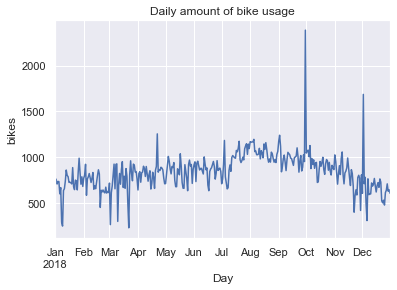

In [18]:
# Count bike trips by Day
bikes_by_day = df_LA.pivot_table("bike_id", aggfunc='count', index="Day" )
ax = bikes_by_day.plot(title ="Daily amount of bike usage", legend=False)
ax.set_xlabel("Day")
ax.set_ylabel("bikes")

In [19]:
#Weekly
bikes_by_weekday = bikes_by_day.groupby(bikes_by_day.index.dayofweek).mean()
bikes_by_weekday= bikes_by_weekday.rename(index={0: "Mo", 1: "Tu",2: "We",3: "Th",4: "Fr",5: "Sa",6: "Su"})

Text(0.5, 0, 'Weekday')

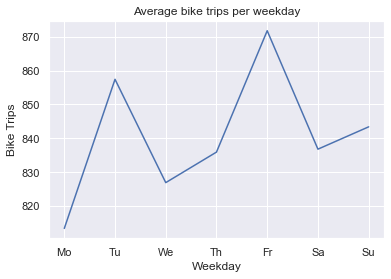

In [20]:
ax= bikes_by_weekday.plot(title ="Average bike trips per weekday", legend=False)
ax.set_ylabel("Bike Trips")
ax.set_xlabel("Weekday")

In [21]:
df_LA.isnull().sum()

start_time                0
end_time                  0
start_station_id          0
end_station_id            0
bike_id                   0
user_type                 0
start_station_name        0
end_station_name          0
trip_duration             0
trip_duration_in_hours    0
Time                      0
Day                       0
Weekday                   0
Hour                      0
dtype: int64

Text(0.5, 0, 'Hour')

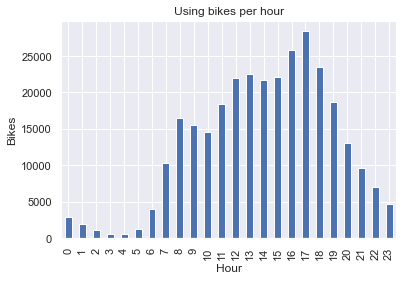

In [22]:
# Hours
bikes_by_hour = df_LA.pivot_table("bike_id", aggfunc='count', index="Hour")
ax = bikes_by_hour.plot(title ="Using bikes per hour", legend=False, kind = "bar")
ax.set_ylabel("Bikes")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Seasons')

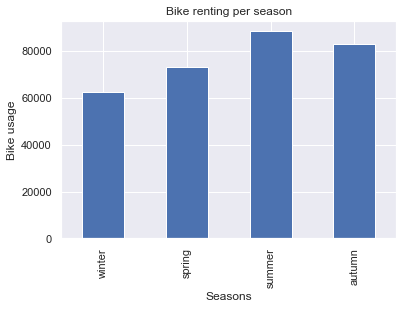

In [23]:
x = df_LA.copy()
x["season"] = x.Day.dt.month%12 // 3 + 1
season_time = x.pivot_table("bike_id", aggfunc ='count', index = "season" )
season_time = season_time.rename(index={ 1: "winter",2: "spring", 3: "summer", 4:"autumn"})
ax = season_time.plot(title ="Bike renting per season", legend=False, kind ="bar")
ax.set_ylabel("Bike usage")
ax.set_xlabel("Seasons")